### Project description

This project is about visualizing insights from expenses data provided from Privatbank bank statements.

Goals: 
- predict missing categories and clean up the data
- understand the most frequent expense
- find out the most costly category
- find out the weekday on which most money is spend
- find out the hour, or time range on which most money is spend


### Project plan
- explore the data
- clean up the data
- predict missing categories by looking at the transaction description
- find out the most costly category
- find out the place with the biggest amount of transactions
- find out the weekday on which most money is spend
- find out the hour, or time range on which most money is spend
- plot correlation between time and amount of money spent

## Step 1: Explore the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("statements.csv")

In [3]:
df.head()

,Дата,Час,Категорія,Картка,Опис операції,Сума у валюті картки,Валюта картки,Сума у валюті транзакції,Валюта транзакції,Залишок на кінець періоду,Валюта залишку
0,04.12.2018,18:47,Туризм,Картка Універсальна (****2297),Послуги туризму та транспортних перевезень: Pr...,-2.50,грн,2.50,грн,762.17,грн
1,04.12.2018,18:34,Інше,Картка Універсальна (****2297),"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,грн,634.00,грн,764.67,грн
2,04.12.2018,14:33,Інше,Картка Універсальна (****2297),"Продукти: Сильпо, Львiв, вул. Пiд Дубом, 7",-63.59,грн,63.59,грн,130.67,грн
3,04.12.2018,13:15,Інше,Картка Універсальна (****2297),Оплата в інтернет-магазині,-265.00,грн,265.00,грн,194.26,грн
4,04.12.2018,00:54,Розваги,Картка Універсальна (****2297),"Музика: ITUNES.COM/BILL, ITUNES.COM",-70.54,грн,2.49,дол,459.26,грн


In [4]:
df.dtypes

Дата                          object
Час                           object
Категорія                     object
Картка                        object
Опис операції                 object
Сума у валюті картки         float64
Валюта картки                 object
Сума у валюті транзакції     float64
Валюта транзакції             object
Залишок на кінець періоду    float64
Валюта залишку                object
dtype: object

## Step 2: Clean the data

Dropping columns that don't have important info, or the info is constant


In [5]:
df = df.drop(columns=["Валюта картки",
                        "Валюта залишку", "Картка"])

In [6]:
df.head()

,Дата,Час,Категорія,Опис операції,Сума у валюті картки,Сума у валюті транзакції,Валюта транзакції,Залишок на кінець періоду
0,04.12.2018,18:47,Туризм,Послуги туризму та транспортних перевезень: Pr...,-2.50,2.50,грн,762.17
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67
2,04.12.2018,14:33,Інше,"Продукти: Сильпо, Львiв, вул. Пiд Дубом, 7",-63.59,63.59,грн,130.67
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26
4,04.12.2018,00:54,Розваги,"Музика: ITUNES.COM/BILL, ITUNES.COM",-70.54,2.49,дол,459.26


### Renaming columns

In [7]:
df.rename(columns={'Дата': 'date',
                     'Час':'time',
                     'Категорія':'category',
                     'Опис операції':'description',
                     'Сума у валюті картки':'transaction',
                     'Сума у валюті транзакції':'abs',
                     'Валюта транзакції':'currency',
                     'Залишок на кінець періоду':'balance',
                    }, 
                 inplace=True)

In [8]:
df.head()

,date,time,category,description,transaction,abs,currency,balance
0,04.12.2018,18:47,Туризм,Послуги туризму та транспортних перевезень: Pr...,-2.50,2.50,грн,762.17
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67
2,04.12.2018,14:33,Інше,"Продукти: Сильпо, Львiв, вул. Пiд Дубом, 7",-63.59,63.59,грн,130.67
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26
4,04.12.2018,00:54,Розваги,"Музика: ITUNES.COM/BILL, ITUNES.COM",-70.54,2.49,дол,459.26


### Understanding the data

In [9]:
descriptions = df.description.unique()
for description in descriptions:
    print(description)

Послуги туризму та транспортних перевезень: PrivatQR, ID платежу 886558795
Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: Head Office
Продукти: Сильпо, Львiв, вул. Пiд Дубом, 7
Оплата в інтернет-магазині
Музика: ITUNES.COM/BILL, ITUNES.COM
Переказ з карти ПриватБанку через додаток Приват24. Відправник: Захарченко Ірина Русланівна. Коментар до платежу: вiд Iри за квиточки Львiв Киiв Львiв.
Залізничні послуги: WWW.UZ.GOV.UA, KYIV
Переказ зі своєї карти 51**85 через додаток Приват24. Коментар до платежу: . Получатель: БАЦЕНКО ТЕТЯНА МАКСИМIВНА
Продукти: FOP SAVARYN A.I., LVIV
Ресторан: TRAPEZNA UCU, LVIV
Переказ з карти ПриватБанку через додаток Приват24. Відправник: Козак Олександр Андрійович. Коментар до платежу: . Получатель: БАЦЕНКО ТЕТЯНА МАКСИМIВНА
Продукти: Магазин продуктiв Близенько, Львiв, Угорская, 12
Предавторизація: UKLON.COM.UA
Предавторизація: Uber BV
Переказ зі своєї карти
Одяг: Одяг для всiєї сiм&apos;ї Дюна, Львiв, Кулиша, 20
Продукти: MAGAZYN ROSHEN M44, M.LVIV
Ресторан: 

In [39]:
categs = df.category.unique()
print('Number of categories', len(categs))
for category in categs:
    print(category)

('Number of categories', 16)
PUBLIC TRANSPORT
Інше
FOOD
FUN
MONEY TRANSFER
TRAVEL
TRAPEZNA
TAXI
CLOTHES
CAFE
Розваги
Поповнення мобільного
Видача готівки
Туризм
Перекази
HEALTH


In [11]:
df.loc[df['category'] == 'Інше']

,date,time,category,description,transaction,abs,currency,balance
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67
2,04.12.2018,14:33,Інше,"Продукти: Сильпо, Львiв, вул. Пiд Дубом, 7",-63.59,63.59,грн,130.67
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26
5,03.12.2018,19:27,Інше,Переказ з карти ПриватБанку через додаток Прив...,393.00,393.00,грн,529.80
7,03.12.2018,19:01,Інше,Переказ зі своєї карти 51**85 через додаток Пр...,1000.00,1000.00,грн,1318.20
10,02.12.2018,22:16,Інше,Переказ з карти ПриватБанку через додаток Прив...,128.00,128.00,грн,391.05
11,02.12.2018,18:03,Інше,"Продукти: Магазин продуктiв Близенько, Львiв, ...",-88.00,88.00,грн,263.05
12,02.12.2018,00:22,Інше,Предавторизація: UKLON.COM.UA,-110.00,110.00,грн,351.05
13,01.12.2018,21:21,Інше,Предавторизація: Uber BV,-94.89,94.36,грн,461.05
14,01.12.2018,20:59,Інше,Переказ зі своєї карти 51**85 через додаток Пр...,500.00,500.00,грн,555.94


In [12]:
df.loc[df['category'] == 'Інше'].count()

date           60
time           60
category       60
description    60
transaction    60
abs            60
currency       60
balance        60
dtype: int64

### Understanding the keywords in transaction description and renaming them

In [13]:
df.head(50)

,date,time,category,description,transaction,abs,currency,balance
0,04.12.2018,18:47,Туризм,Послуги туризму та транспортних перевезень: Pr...,-2.50,2.50,грн,762.17
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67
2,04.12.2018,14:33,Інше,"Продукти: Сильпо, Львiв, вул. Пiд Дубом, 7",-63.59,63.59,грн,130.67
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26
4,04.12.2018,00:54,Розваги,"Музика: ITUNES.COM/BILL, ITUNES.COM",-70.54,2.49,дол,459.26
5,03.12.2018,19:27,Інше,Переказ з карти ПриватБанку через додаток Прив...,393.00,393.00,грн,529.80
6,03.12.2018,19:10,Туризм,"Залізничні послуги: WWW.UZ.GOV.UA, KYIV",-1181.40,1181.40,грн,136.80
7,03.12.2018,19:01,Інше,Переказ зі своєї карти 51**85 через додаток Пр...,1000.00,1000.00,грн,1318.20
8,03.12.2018,18:57,Продукти харчування,"Продукти: FOP SAVARYN A.I., LVIV",-45.60,45.60,грн,318.20
9,03.12.2018,15:50,"Кафе, бари, ресторани","Ресторан: TRAPEZNA UCU, LVIV",-27.25,27.25,грн,363.80


### From this data I'd divide the data into following categories based on various description: 
- TRAVEL - everything related to the railway or flight tickets, or hotels, or transactions that already have 'Туризм' category
- FOOD - all transactions related to buying something is supermarket
- FUN - monthly subscription to the music, cinema tickets, transactions that already have 'Розваги' category
- CLOTHES - buying something in a clothes store, corresponding keywords in description or already marked with appropriate category
- CAFE - eating out in a cafe or restorant or coffee
- TRAPEZNA - eating at UCU
- TAXI - uklon, uber, or other taxi rides - defined from description
- PUBLIC TRANSPORT - subway or tram rides - keywords availible in the description.
- MONEY TRANSFER - transfer from one card to another. 
- HEALTH - pharmacy & medcenter transactions

#### Notice, that some transactions have category 'Інше' but at the same time enough information in the description to predict it's true category.

Let's define some description keywords which will be used as a category names later on.

In [14]:
df['description'] = df['description'].replace(
    {
        'Ресторан': 'CAFE',
        'Кафе': 'CAFE',
        'Кава': 'CAFE',
        'Туризм': 'TRAVEL',
        'Залізничні': 'TRAVEL',
        'Продукти': 'FOOD',
        'Сильпо': 'FOOD',
        'Продукти харчування': 'FOOD',
        'Музика': 'FUN',
        'Розваги': 'FUN',
        'KINOMARKET': 'FUN',
        'Одяг': 'CLOTHES',
        'ЛИМУЗИНЫ': 'TAXI',
        'UKLON': 'TAXI',
        'Uber': 'TAXI',
        'UKLON': 'TAXI',
        'Таксі': 'TAXI',
        'Здоров\'я': 'HEALTH',
        'Медицина': 'HEALTH',
        'Аптека': 'HEALTH',
        'Послуги туризму та транспортних перевезень': 'PUBLIC TRANSPORT',
        'Переказ': 'MONEY TRANSFER'
    }, regex=True)

### Label categories where possible

In [15]:
df.loc[df.description.str.contains("TAXI"), "category"] = "TAXI"

In [16]:
df.loc[df.description.str.contains("FOOD"), "category"] = "FOOD"

In [17]:
df.loc[df.description.str.contains("FUN"), "category"] = "FUN"

In [18]:
df.loc[df.description.str.contains("CLOTHES"), "category"] = "CLOTHES"

In [19]:
df.loc[df.description.str.contains("CAFE"), "category"] = "CAFE"

In [20]:
df.loc[df.description.str.contains("TRAVEL"), "category"] = "TRAVEL"

In [21]:
df.loc[df.description.str.contains("PUBLIC TRANSPORT"), "category"] = "PUBLIC TRANSPORT"

In [22]:
df.loc[df.description.str.contains("TRAPEZNA"), "category"] = "TRAPEZNA"

In [23]:
df.loc[df.description.str.contains("MONEY TRANSFER"), "category"] = "MONEY TRANSFER"

In [24]:
df.loc[df.description.str.contains("HEALTH"), "category"] = "HEALTH"

In [25]:
df.head(200)

,date,time,category,description,transaction,abs,currency,balance
0,04.12.2018,18:47,PUBLIC TRANSPORT,"PUBLIC TRANSPORT: PrivatQR, ID платежу 886558795",-2.50,2.50,грн,762.17
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67
2,04.12.2018,14:33,FOOD,"FOOD: FOOD, Львiв, вул. Пiд Дубом, 7",-63.59,63.59,грн,130.67
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26
4,04.12.2018,00:54,FUN,"FUN: ITUNES.COM/BILL, ITUNES.COM",-70.54,2.49,дол,459.26
5,03.12.2018,19:27,MONEY TRANSFER,MONEY TRANSFER з карти ПриватБанку через додат...,393.00,393.00,грн,529.80
6,03.12.2018,19:10,TRAVEL,"TRAVEL послуги: WWW.UZ.GOV.UA, KYIV",-1181.40,1181.40,грн,136.80
7,03.12.2018,19:01,MONEY TRANSFER,MONEY TRANSFER зі своєї карти 51**85 через дод...,1000.00,1000.00,грн,1318.20
8,03.12.2018,18:57,FOOD,"FOOD: FOP SAVARYN A.I., LVIV",-45.60,45.60,грн,318.20
9,03.12.2018,15:50,TRAPEZNA,"CAFE: TRAPEZNA UCU, LVIV",-27.25,27.25,грн,363.80


##### See how many columns now have 'Інше' category

In [26]:
df.loc[df['category'] == 'Інше']

,date,time,category,description,transaction,abs,currency,balance
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26
30,29.11.2018,14:42,Інше,#5168 **** **** 2297 БАЦЕНКО ТЕТЯНА МАКСИМ?ВНА...,9.99,9.99,грн,376.20
53,15.11.2018,10:47,Інше,Зарахування переказу на карту Roman Batsenko,547.30,547.30,грн,1303.31
64,12.11.2018,13:45,Інше,ПОКУПКА ТОВАРА,-40.00,40.00,грн,687.01
67,11.11.2018,19:28,Інше,"Універмаг: CGN Heinem. Duty Free, Koeln",-32.05,1.00,євро,963.61
76,10.11.2018,19:52,Інше,"Універмаг: Heinemann Duty Free, Frankfurt",-330.13,10.30,євро,1112.38
83,09.11.2018,02:11,Інше,Предавторизація: UBER TRIP DL6LU HELP.U,-202.26,6.27,євро,971.31
100,05.11.2018,11:29,Інше,"Телеком послуги: TAXER, ID платежу 861314198",-405.00,405.00,грн,1500.81
117,02.11.2018,13:41,Інше,"Подарунки/Іграшки: EMOZZI, ID платежу 859167644",-1099.00,1099.00,грн,4963.40


In [27]:
df.loc[df['category'] == 'Інше'].count()

date           14
time           14
category       14
description    14
transaction    14
abs            14
currency       14
balance        14
dtype: int64

### Plot balance through time

In [28]:
import numpy as np

Populating the interactive namespace from numpy and matplotlib


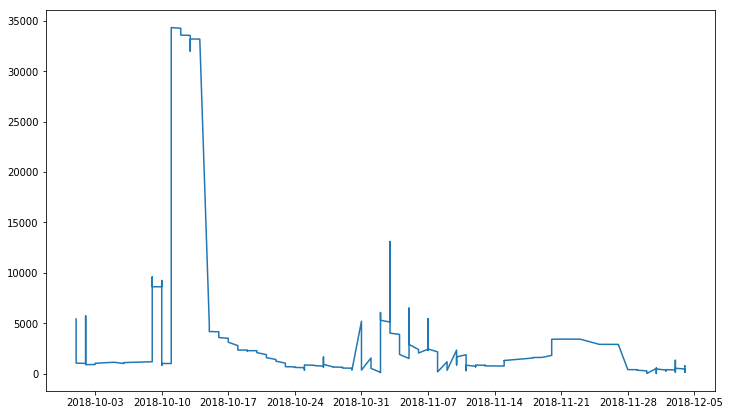

In [29]:
import matplotlib.pyplot as plt
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 7)   # Change the size of plots
 
from datetime import datetime
date_objects = [datetime.strptime(date, '%d.%m.%Y').date() for date in df.date]
plt.plot(date_objects, df.balance)

#### Sum of transactions

In [30]:
df['transaction'].sum()

340.7100000000005

In [31]:
categories = df.category.unique()
for categ in categories:
    print(categ)

PUBLIC TRANSPORT
Інше
FOOD
FUN
MONEY TRANSFER
TRAVEL
TRAPEZNA
TAXI
CLOTHES
CAFE
Розваги
Поповнення мобільного
Видача готівки
Туризм
Перекази
HEALTH


In [32]:
df.loc[df['category'] == 'TAXI'].transaction.sum()

-1120.33

#### The place where I spend money most frequently

In [33]:
most_frequent_desc = df['description'].value_counts().idxmax()

In [34]:
print(most_frequent_desc)

CAFE: TRAPEZNA UCU, LVIV


### The  most frequent category 

In [35]:
most_frequent_category = df['category'].value_counts().idxmax()

In [36]:
print(most_frequent_category)

MONEY TRANSFER
